In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("gene_expression.csv")

In [4]:
df.head(5)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [5]:
# Basic statistical summary
print(df.describe())


          Gene One     Gene Two  Cancer Present
count  3000.000000  3000.000000     3000.000000
mean      5.600133     5.410467        0.500000
std       1.828388     1.729081        0.500083
min       1.000000     1.000000        0.000000
25%       4.300000     4.000000        0.000000
50%       5.600000     5.400000        0.500000
75%       6.900000     6.700000        1.000000
max      10.000000    10.000000        1.000000


In [6]:
# Check for null values
print("Null values in each column:")
print(df.isnull().sum())


Null values in each column:
Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64


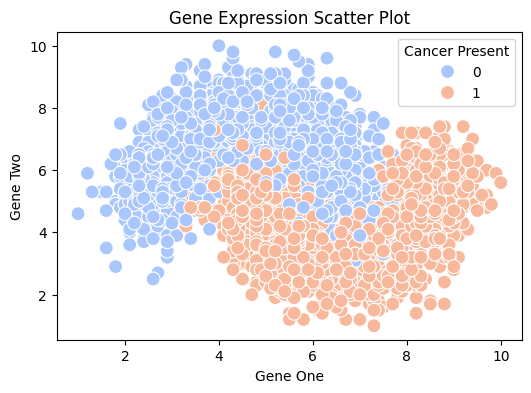

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', palette='coolwarm', s=100)
plt.title('Gene Expression Scatter Plot')
plt.show()


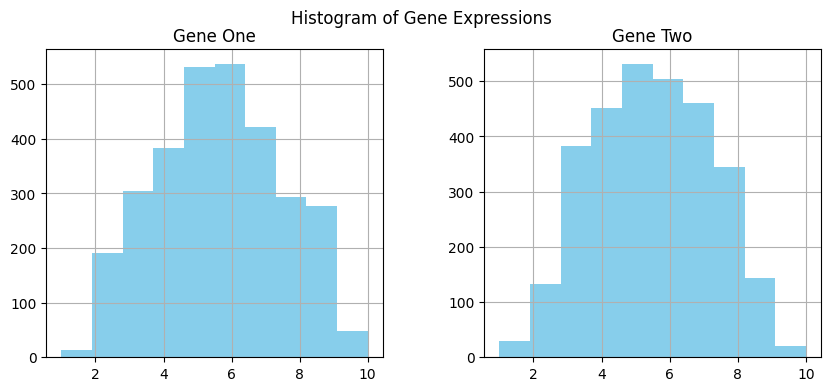

In [8]:
df[['Gene One', 'Gene Two']].hist(bins=10, figsize=(10,4), color='skyblue')
plt.suptitle("Histogram of Gene Expressions")
plt.show()


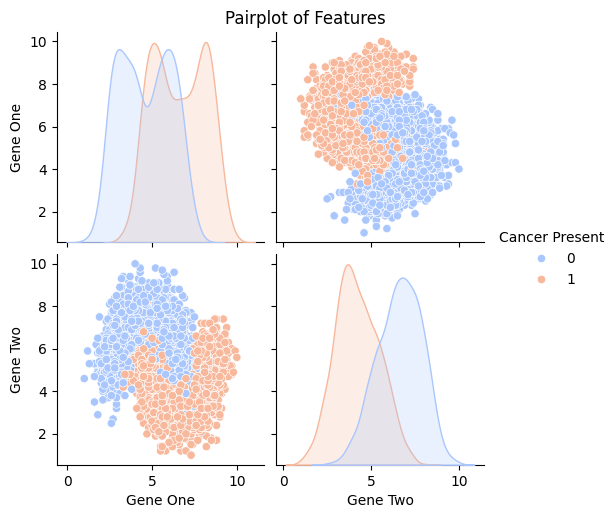

In [9]:
sns.pairplot(df, hue='Cancer Present', palette='coolwarm')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


C:\Users\Sai babu\AppData\Local\Temp\ipykernel_40244\1087481775.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_non_null.index, y=percent_non_null.values, palette="viridis")


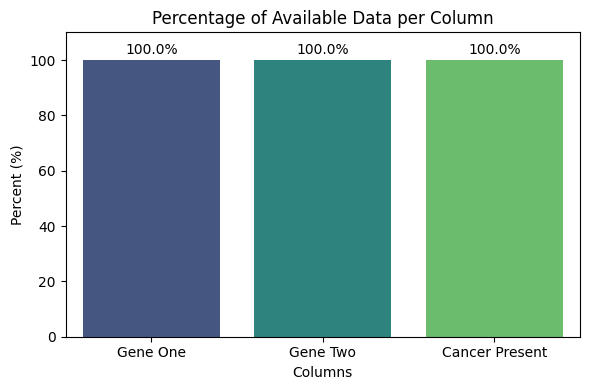

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate non-null percentages
percent_non_null = df.notnull().mean() * 100

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=percent_non_null.index, y=percent_non_null.values, palette="viridis")

plt.title("Percentage of Available Data per Column")
plt.ylabel("Percent (%)")
plt.ylim(0, 110)
plt.xlabel("Columns")

# Annotate values on top of bars
for i, val in enumerate(percent_non_null.values):
    plt.text(i, val + 2, f"{val:.1f}%", ha='center')

plt.tight_layout()
plt.show()


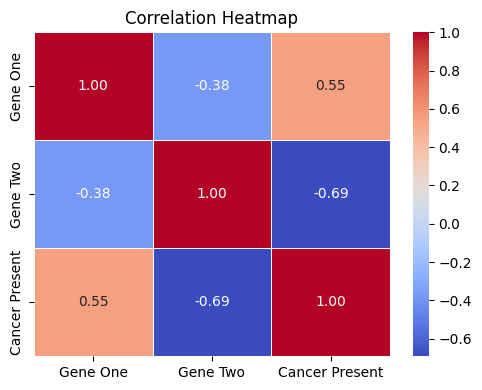

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Gene One has a moderate positive correlation (+0.55) with cancer presence → could be a cancer-indicative gene.

Gene Two has a strong negative correlation (-0.69) → its lower values may relate to cancer presence.

No extreme multicollinearity between features (no correlation above 0.9 between features) → ✅ good for modeling.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Define features and target
X = df[['Gene One', 'Gene Two']]
y = df['Cancer Present']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Feature Scaling (important for SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 5. Train & Evaluate each model
for name, model in models.items():
    print(f"\n🔹 {name}")
    
    if name in ["SVM", "KNN"]:  # use scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:  # Random Forest and Logistic can work without scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔹 Logistic Regression
Accuracy: 0.8525252525252526
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       510
           1       0.84      0.86      0.85       480

    accuracy                           0.85       990
   macro avg       0.85      0.85      0.85       990
weighted avg       0.85      0.85      0.85       990


🔹 SVM
Accuracy: 0.9424242424242424
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       510
           1       0.95      0.93      0.94       480

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990


🔹 KNN
Accuracy: 0.9212121212121213
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       510
           1       0.93      0.91      0.

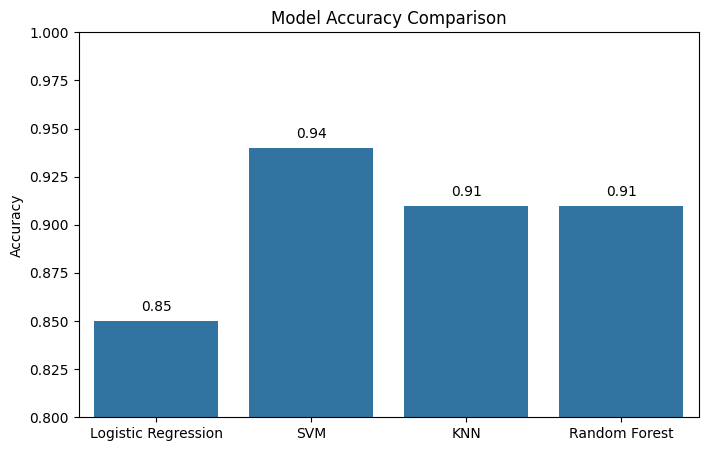

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies (based on your output)
models = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest']
accuracies = [0.85, 0.94, 0.91, 0.91] 
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
for i, val in enumerate(accuracies):
    plt.text(i, val + 0.005, f"{val:.2f}", ha='center')
plt.show()


In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}


In [21]:
# Train SVM separately if not trained already
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Save trained model and scaler
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

c:\Users\Sai babu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction: Cancer Present


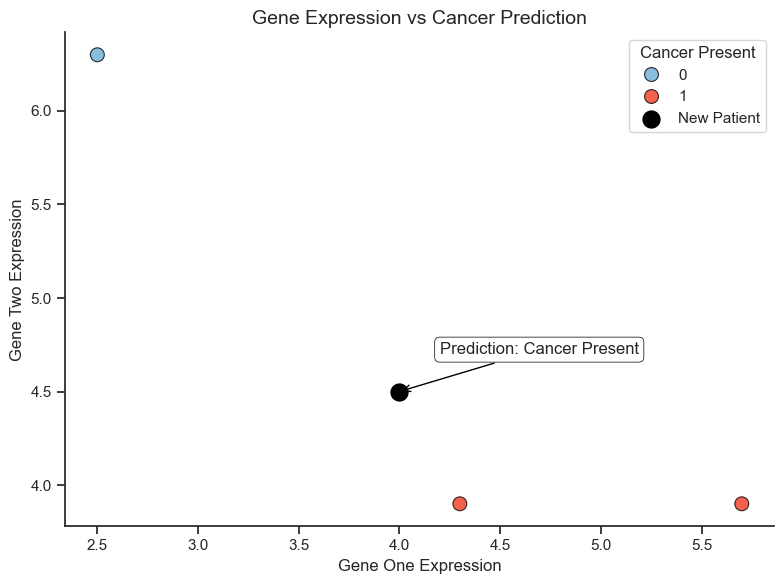

In [27]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the model and scaler
svm_loaded = joblib.load("svm_model.pkl")
scaler_loaded = joblib.load("scaler.pkl")

# Load original dataset (replace with your full dataset if needed)
df = pd.DataFrame({
    'Gene One': [4.3, 2.5, 5.7],
    'Gene Two': [3.9, 6.3, 3.9],
    'Cancer Present': [1, 0, 1]
})

# Ask user for input
gene_one_val = float(input("Enter Gene One expression value: "))
gene_two_val = float(input("Enter Gene Two expression value: "))

# Prepare and scale the input
new_input = [[gene_one_val, gene_two_val]]
scaled_input = scaler_loaded.transform(new_input)

# Predict
prediction = svm_loaded.predict(scaled_input)
label = "Cancer Present" if prediction[0] == 1 else "No Cancer"
print("\nPrediction:", label)

# Clean and minimal visualization
plt.figure(figsize=(8,6))
sns.set(style="ticks")

# Plot training data
sns.scatterplot(
    x=df['Gene One'],
    y=df['Gene Two'],
    hue=df['Cancer Present'],
    palette={0: '#6baed6', 1: '#f03b20'},
    s=100,
    edgecolor='black',
    alpha=0.8,
    legend='brief'
)

# Plot the new input
plt.scatter(
    gene_one_val,
    gene_two_val,
    color='black',
    s=200,
    edgecolor='white',
    label='New Patient'
)

# Add a subtle annotation
plt.annotate(
    f"Prediction: {label}",
    xy=(gene_one_val, gene_two_val),
    xytext=(gene_one_val + 0.2, gene_two_val + 0.2),
    fontsize=12,
    arrowprops=dict(arrowstyle="->", color='black', lw=1),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)
)

# Final touches
plt.title("Gene Expression vs Cancer Prediction", fontsize=14)
plt.xlabel("Gene One Expression")
plt.ylabel("Gene Two Expression")
plt.legend(title="Cancer Present")
sns.despine()
plt.tight_layout()
plt.show()

